In [ ]:
########### Simple Linear Regression Assignment###########

In [ ]:
# Salary_hike -> Build a prediction model for Salary_hike#

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
salary_data=pd.read_csv('Salary_Data.csv')
salary_data


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [2]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [3]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


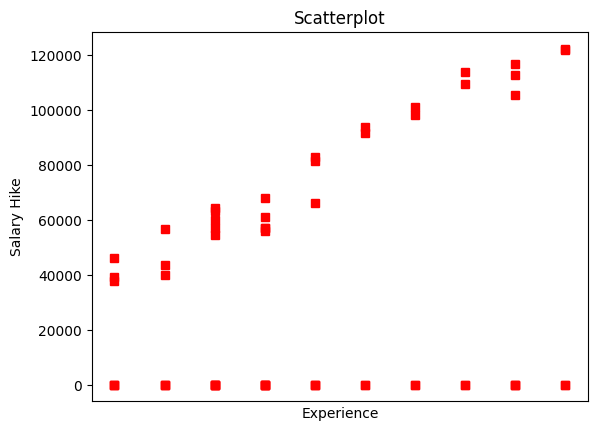

In [27]:
plt.plot(salary_data,'rs')
plt.xlabel('Experience')
plt.ylabel('Salary Hike')
plt.title('Scatterplot')
plt.show()

<ipython-input-29-64f379acd83e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary_data)


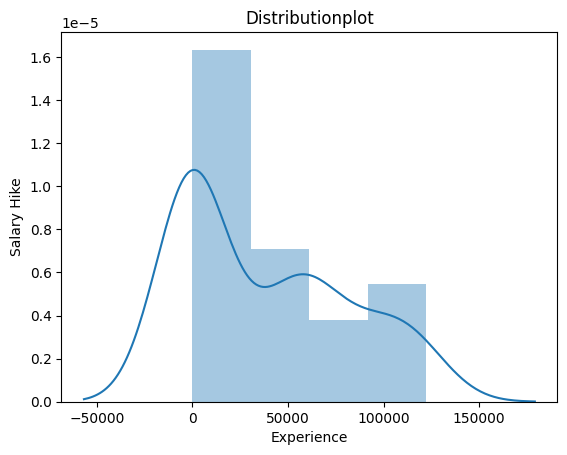

In [29]:
sns.distplot(salary_data)
plt.xlabel('Experience')
plt.ylabel('Salary Hike')
plt.title('Distributionplot')
plt.show()

In [30]:
salary_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [36]:
import statsmodels.formula.api as smf
model=smf.ols("Salary~YearsExperience",data=salary_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 28 Jun 2023   Prob (F-statistic):           1.14e-20
Time:                        10:54:20   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

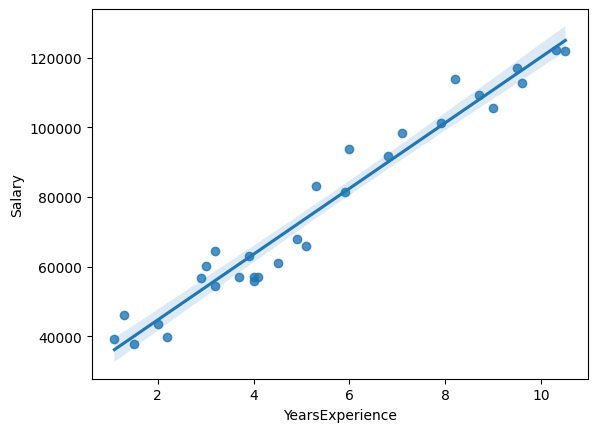

In [39]:
sns.regplot(x='YearsExperience',y='Salary',data=salary_data);

In [42]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [43]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [44]:
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [ ]:
# Predict on New data point#

In [53]:
newdata=pd.Series([1.1,2.0,3.0])
data_pred=pd.DataFrame(newdata,columns=['YearsExperience'])
model.predict(data_pred)

0    36187.158752
1    44692.124842
2    54142.087163
dtype: float64